In [75]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [76]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [77]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [78]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [79]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [80]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [81]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [82]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [83]:
# Find the most recent date in the data set.
# first_date=session.query(Measurement.date).order_by(Measurement.date).first().date
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
# print(first_date)
print(recent_date)

2017-08-23


In [84]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.
last_year = dt.date(2017,8,23) - dt.timedelta(days = 365)
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year).\
order_by(Measurement.date).all()
precipitation[0]


('2016-08-24', 0.08)

In [85]:
# Convert your results into a pandas DataFrame with date as index.
precipitation_df = pd.DataFrame(precipitation)
precipitation_df = precipitation_df.rename(columns={0: 'date', 1: 'prcp'})
precipitation_df.head()


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [86]:
precipitation_df.set_index('date')
precipitation_df = precipitation_df.sort_index(ascending = True)
precipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


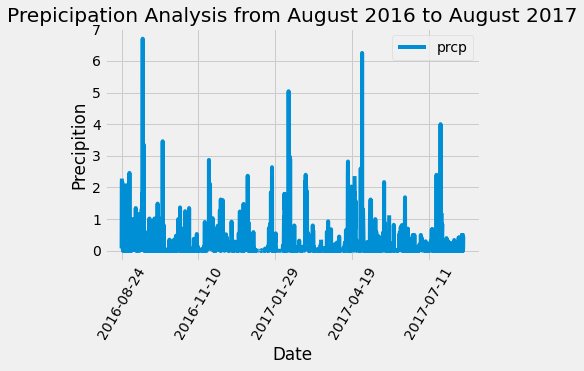

In [98]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot('date','prcp')
plt.title('Prepicipation Analysis from August 2016 to August 2017')
plt.xlabel('Date')
plt.ylabel('Precipition')
plt.xticks(rotation = 60)
plt.savefig("Images/Precipitation_Analysis.png")


In [99]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [100]:
# Query total number of stations in dataset
Stations = session.query(Station).count()
Stations


9

In [101]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Active_Stations = (session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
Most_Active = Active_Stations[0][0]

print("The most active station was " + Most_Active + " with " + str(Active_Stations[0][1]) + " observations.")
print("Here is a list of the stations and total observation counts in descending order.")
for a, b in Active_Stations:
    print("Station " + a + " with " + str(b) + " observations.")


The most active station was USC00519281 with 2772 observations.
Here is a list of the stations and total observation counts in descending order.
Station USC00519281 with 2772 observations.
Station USC00519397 with 2724 observations.
Station USC00513117 with 2709 observations.
Station USC00519523 with 2669 observations.
Station USC00516128 with 2612 observations.
Station USC00514830 with 2202 observations.
Station USC00511918 with 1979 observations.
Station USC00517948 with 1372 observations.
Station USC00518838 with 511 observations.


In [91]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
temp_stats = (session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs),).\
                  filter(Measurement.station == Active_Stations[0][0]).all()) 
print(f"The lowest:{temp_stats[0][0]}F , highest :{temp_stats[0][1]}F, and average :{temp_stats[0][2]}F temperature")


The lowest:54.0F , highest :85.0F, and average :71.66378066378067F temperature


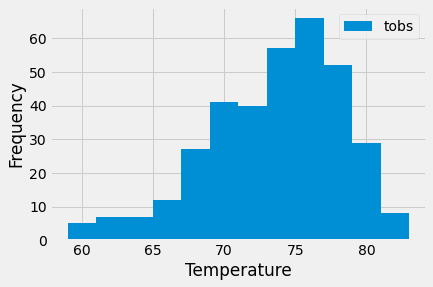

In [96]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.
temperature_results = (session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > last_year).filter(Measurement.station == Active_Stations[0][0]).order_by(Measurement.date).all())
temperature_df = pd.DataFrame(temperature_results)
temperature_df = temperature_df.rename(columns={0: 'date', 1: 'tobs'})
temperature_df = temperature_df.set_index("date").sort_index(ascending = True)

temperature_df.plot(kind = "hist", bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("Images/histogram_last_12.png")


# Close session

In [97]:
session.close()